# Eigendecomposition

This post is the second in a 3-part series on building geometric intuition about key concepts in linear algebra.

1. [Linear Transformations]({% post_url 2018-12-03-linear-transformations %})
1. [Eigendecomposition (this)]({% post_url 2018-12-03-eigendecomposition %})
1. [Singular Value Decomposition (SVD)]({% post_url 2018-12-03-svd %})

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from plot_helper import *
#

# How to explain this transformation $Mx = y$?

$$
\begin{pmatrix}
2 & 1 \\
1 & 2 \\
\end{pmatrix}
\begin{pmatrix}
1 \\
1 \\
\end{pmatrix}
 = 
\begin{pmatrix}
3 \\
3 \\
\end{pmatrix}
$$


In terms of the transformations we discussed in the previous post?

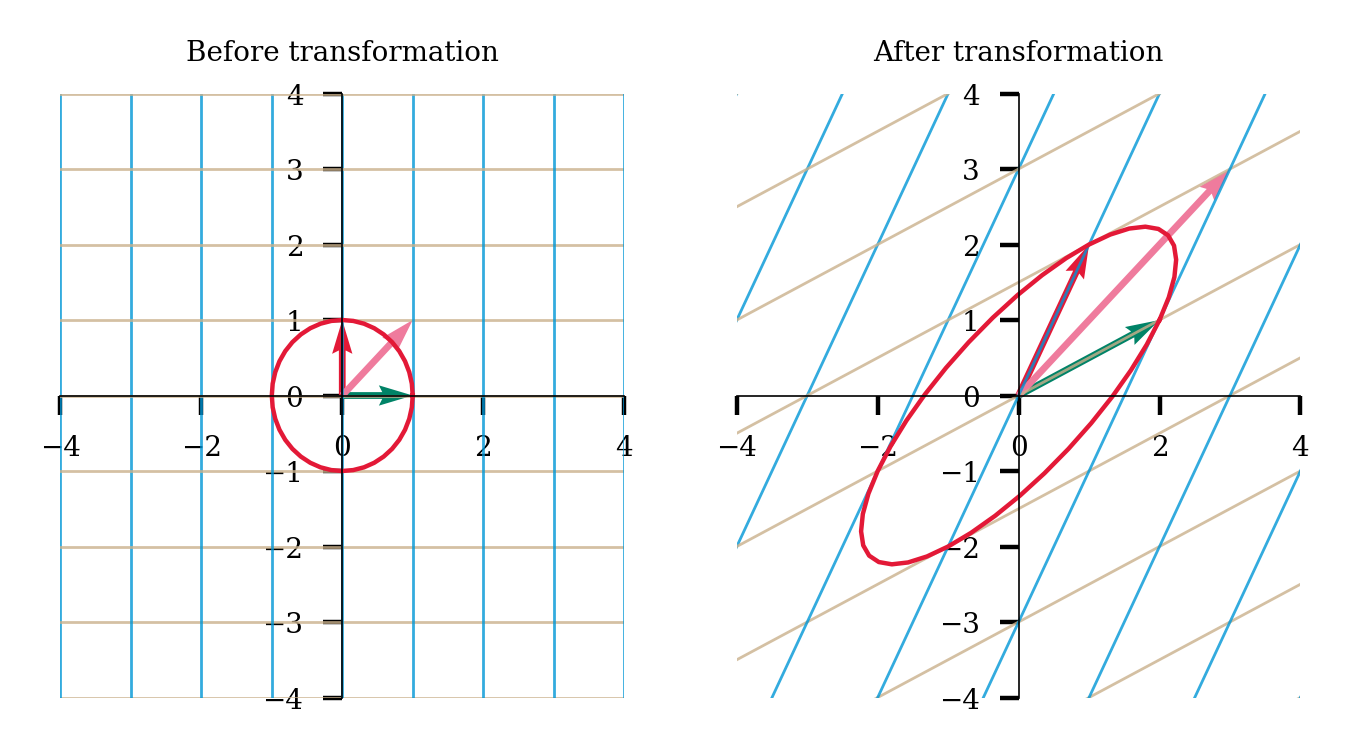

In [77]:
M = np.array([[2, 1],[1, 2]])
x = np.array([1,1])
plot_linear_transformation(M, x, unit_vector=True, unit_circle=True)
#

### Notice that $x$ (<font color='pink'> in pink </font>) has not changed direction, but has been stretched by a factor of 3!

Let's go through these steps to understand the above picture more clearly.
1. Transform the unit circle on the left into the ellipse on the right by multiplying by $M$ 
1. Compute the vectors corresponding to the major and minor axes of the ellipse and then convert them to unit vectors. The coordinates for these vectors will be in terms of the standard coordinate system (on the left)
1. Plot the vectors above (in red) in the standard coordinate system

In [185]:
alpha = np.linspace(0, 2*np.pi, 5001)
circle = np.vstack((np.cos(alpha), np.sin(alpha)))
ellipse = M @ circle    
lengths = np.linalg.norm(ellipse, axis=0)
major = ellipse[:,np.argmax(lengths)]
minor = ellipse[:,np.argmin(lengths)]
major /= np.linalg.norm(major)
minor /= np.linalg.norm(minor)
print(f"Major \n {major} \n\n Minor \n {minor}")
#

Major 
 [-0.70710678 -0.70710678] 

 Minor 
 [-0.70710678  0.70710678]


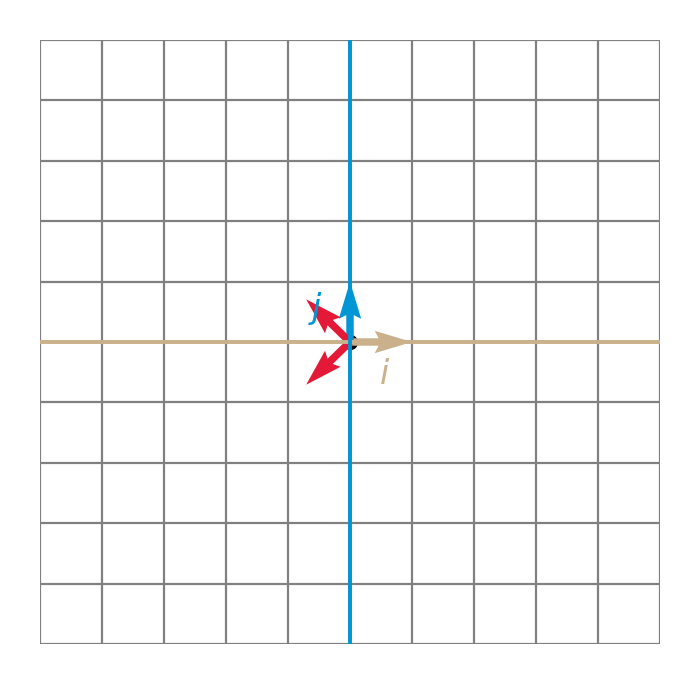

In [186]:
i = np.array([1,0])
j = np.array([0,1])
plot_basis(i,j,major,minor)
#

Let's now compute the eigenvalues and eigenvectors of $M$ and plot them in the standard coordinate system.

In [187]:
L, Q = np.linalg.eig(M)
L = np.diag(L)
print(f"Eigenvalues\n {L} \n\n Eigenvectors\n {Q}")
#

Eigenvalues
 [[3. 0.]
 [0. 1.]] 

 Eigenvectors
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


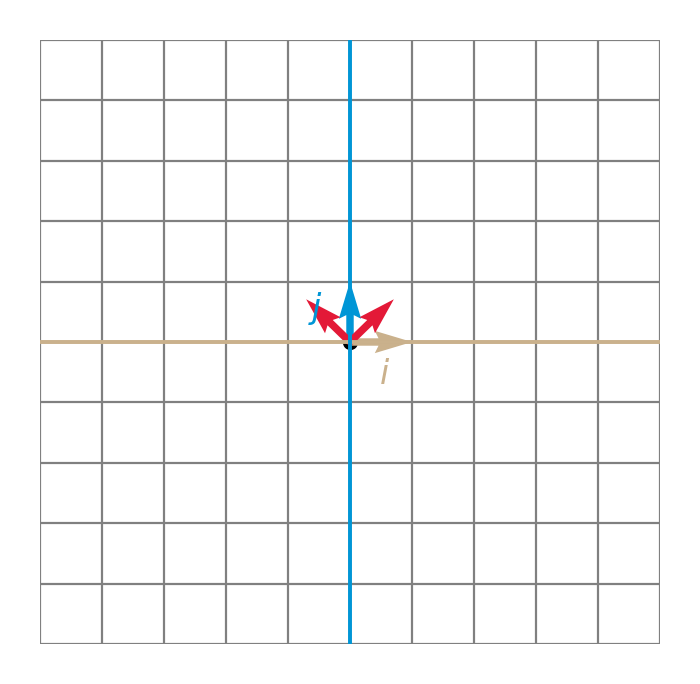

In [189]:
plot_basis(i,j, Q[:,0], Q[:,1])

Notice that the eigenvector $\begin{pmatrix}\frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}}\end{pmatrix}$ corresponding to the largest eigenvalue $3$ identifies the direction in which $M$ has the largest stretching effect (major axis of the ellipse). The other eigenvector $\begin{pmatrix}\frac{-1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}}\end{pmatrix}$ corresponds to the minor axis of the ellipse. Note also that $Q$ is an orthogonal matrix, i.e. the eigenvectors (the columns of $Q$) form an orthonormal basis, i.e. like the standard coordinate system, but rotated.

In [197]:
Q[:,0].dot(Q[:,1])

0.0

# Spectral Theorem

For a square matrix $M$, if $M x = \lambda x$, then $x$ is an eigenvector of $M$ and $\lambda$ is the corresponding eigenvalue. If $M$ is a real symmetric matrix, then $M$ can be factorized as $M = Q L Q^T$. This is a decomposition of $M$ determined by the *spectrum* (eigenvalues) of $M$.

# Summary: Rotate => Scale => Rotate Back

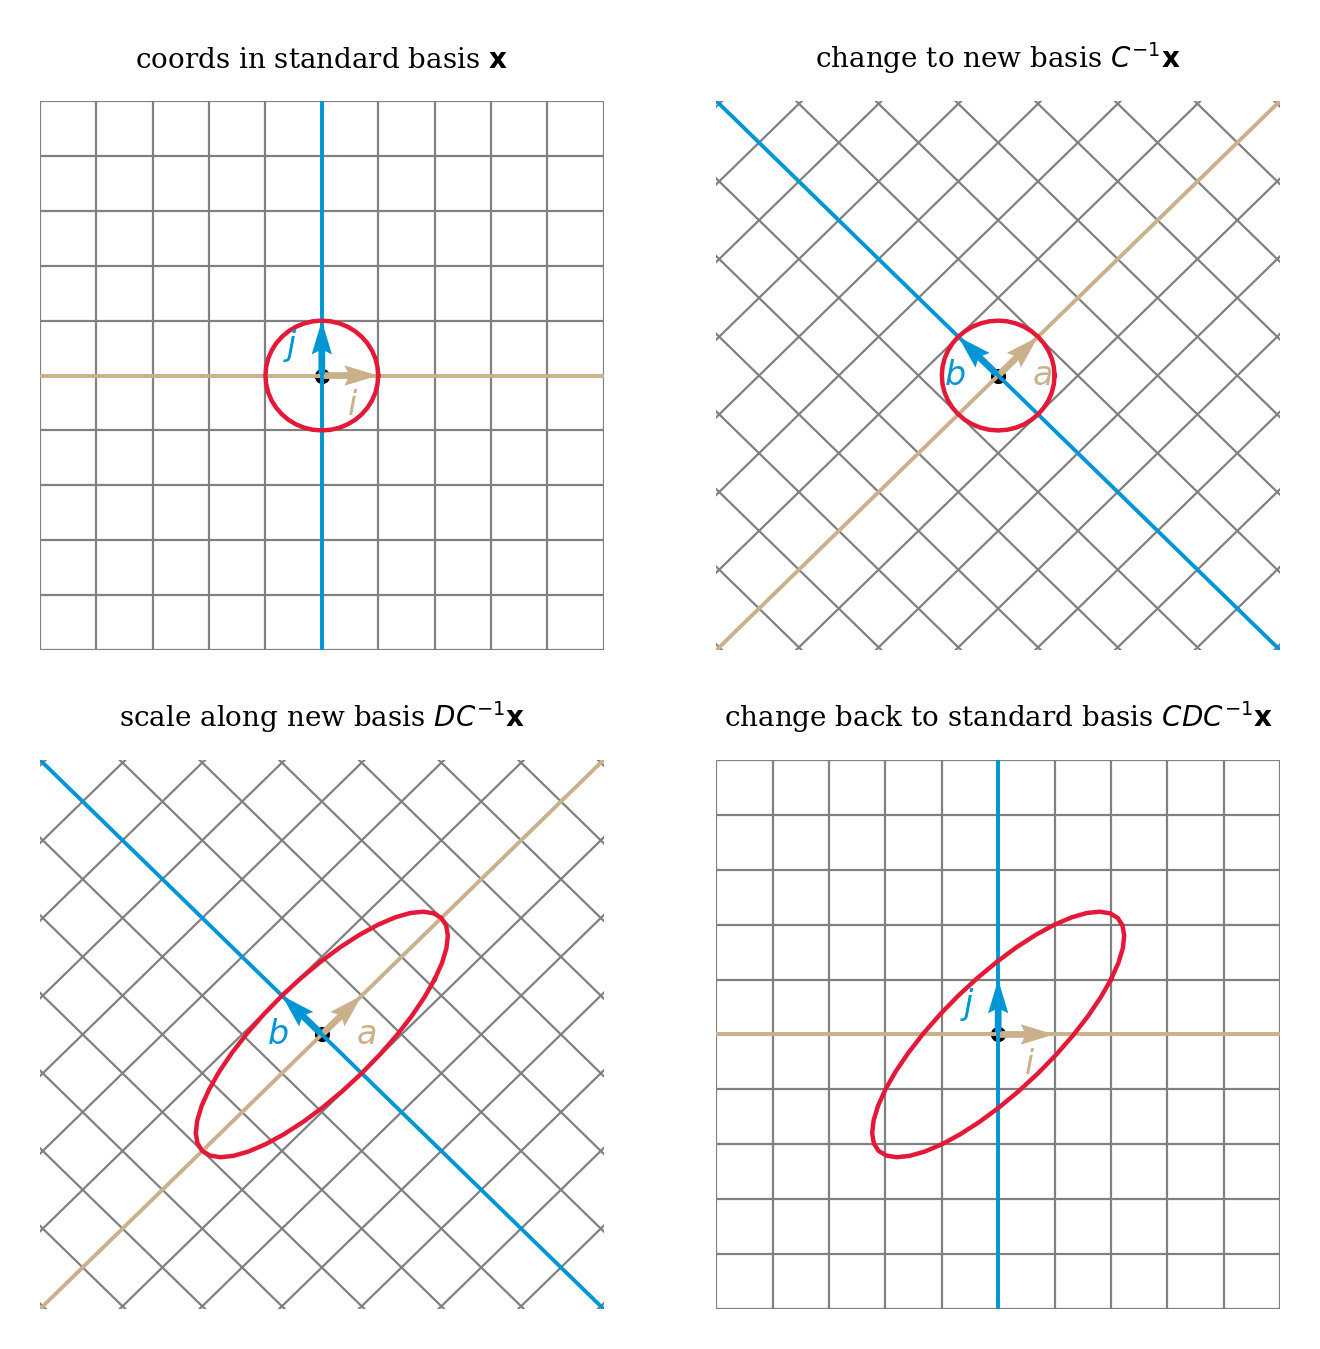

In [11]:
plot_eigen(M)
#

# Application

Consider the equation (a [quadratic form](https://en.wikipedia.org/wiki/Quadratic_form)) $2x^2 + 2xy + 2y^2 = 1$. 

Can we find a change of variables in order to remove the cross-product term in the middle?

We can rewrite the above equation as 
$$
\begin{pmatrix}
x & y \\
\end{pmatrix}
\begin{pmatrix}
2 & 1 \\
1 & 2\\
\end{pmatrix}
\begin{pmatrix}
x \\
y \\
\end{pmatrix}
= 1
$$

Note the matrix in the middle: that's the matrix $M$ we were working with above. 

Let's do the following.
1. The above equation is of the form $\mathbf{u}^T M \mathbf{u} = 1$
1. Let $M = QLQ^T$ (eigendecomposition as above)
1. Let $\mathbf{u} = Q \mathbf{v}$
1. Then  $\mathbf{u}^T M \mathbf{u} = ({Q\mathbf{v}})^T M (Q\mathbf{v}) = \mathbf{v}^T (Q^T M Q) \mathbf{v} = \mathbf{v}^T L \mathbf{v}$
    * We've used the fact that $Q$ is an orthogonal matrix in the above derivation
1. Note that $$Q = \begin{pmatrix}
\frac{1}{\sqrt{2}} & \frac{-1}{\sqrt{2}} \\
\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}
\end{pmatrix} 
,~~
L = \begin{pmatrix}
3 & 0 \\
0 & 1
\end{pmatrix} 
$$
1. Therefore 
$$\mathbf{v} = Q^{-1} \mathbf{u} = Q^T \mathbf{u} =
\begin{pmatrix}
\frac{x+y}{\sqrt{2}} \\
\frac{-x+y}{\sqrt{2}} 
\end{pmatrix}$$
1. Therefore
$$ \mathbf{u}^T M \mathbf{u} = \mathbf{v}^T L \mathbf{v} = 3 \left(\frac{x+y}{\sqrt{2}}\right)^2 + \left(\frac{-x+y}{\sqrt{2}}\right)^2 = 3X^2 + Y^2$$

We've achieved our objective by introducing new variables $X$ and $Y$ to get an equivalent expression without the cross-product term. Let's plot the equations on the two coordinate systems: $x,y$ and $X,Y$.

## xy system: $2x^2 + 2xy + 2y^2$

In [147]:
x = np.linspace(-1.5,1.5,100)
xx, yy = np.meshgrid(x,x)
zz = 2*xx**2 + 2*xx*yy + 2*yy**2

## XY system: $3X^2 + Y^2$ where $X = \frac{x+y}{\sqrt{2}}$ and $Y = \frac{-x+y}{\sqrt{2}}$

In [148]:
X = (xx + yy)/np.sqrt(2)
Y = (-xx + yy)/np.sqrt(2)
Z = 3*X**2 + Y**2

Let's also calculate the eigenvalues and eigenvectors of the diagonal matrix $L$.

In [183]:
L1,Q1 = np.linalg.eig(L)
print(f"Eigenvalues \n {L1}, \n\n Eigenvectors \n {Q1}")
#

Eigenvalues 
 [3. 1.], 

 Eigenvectors 
 [[1. 0.]
 [0. 1.]]


## Plot contours corresponding to $\mathbf{u}^T M \mathbf{u} = c$

In the plots below, we set $c$ to $1,2$ and $3$. The contour corresponding to $c=1$, i.e. the equation we discussed above, is shown in <font color='red'>red</font>.

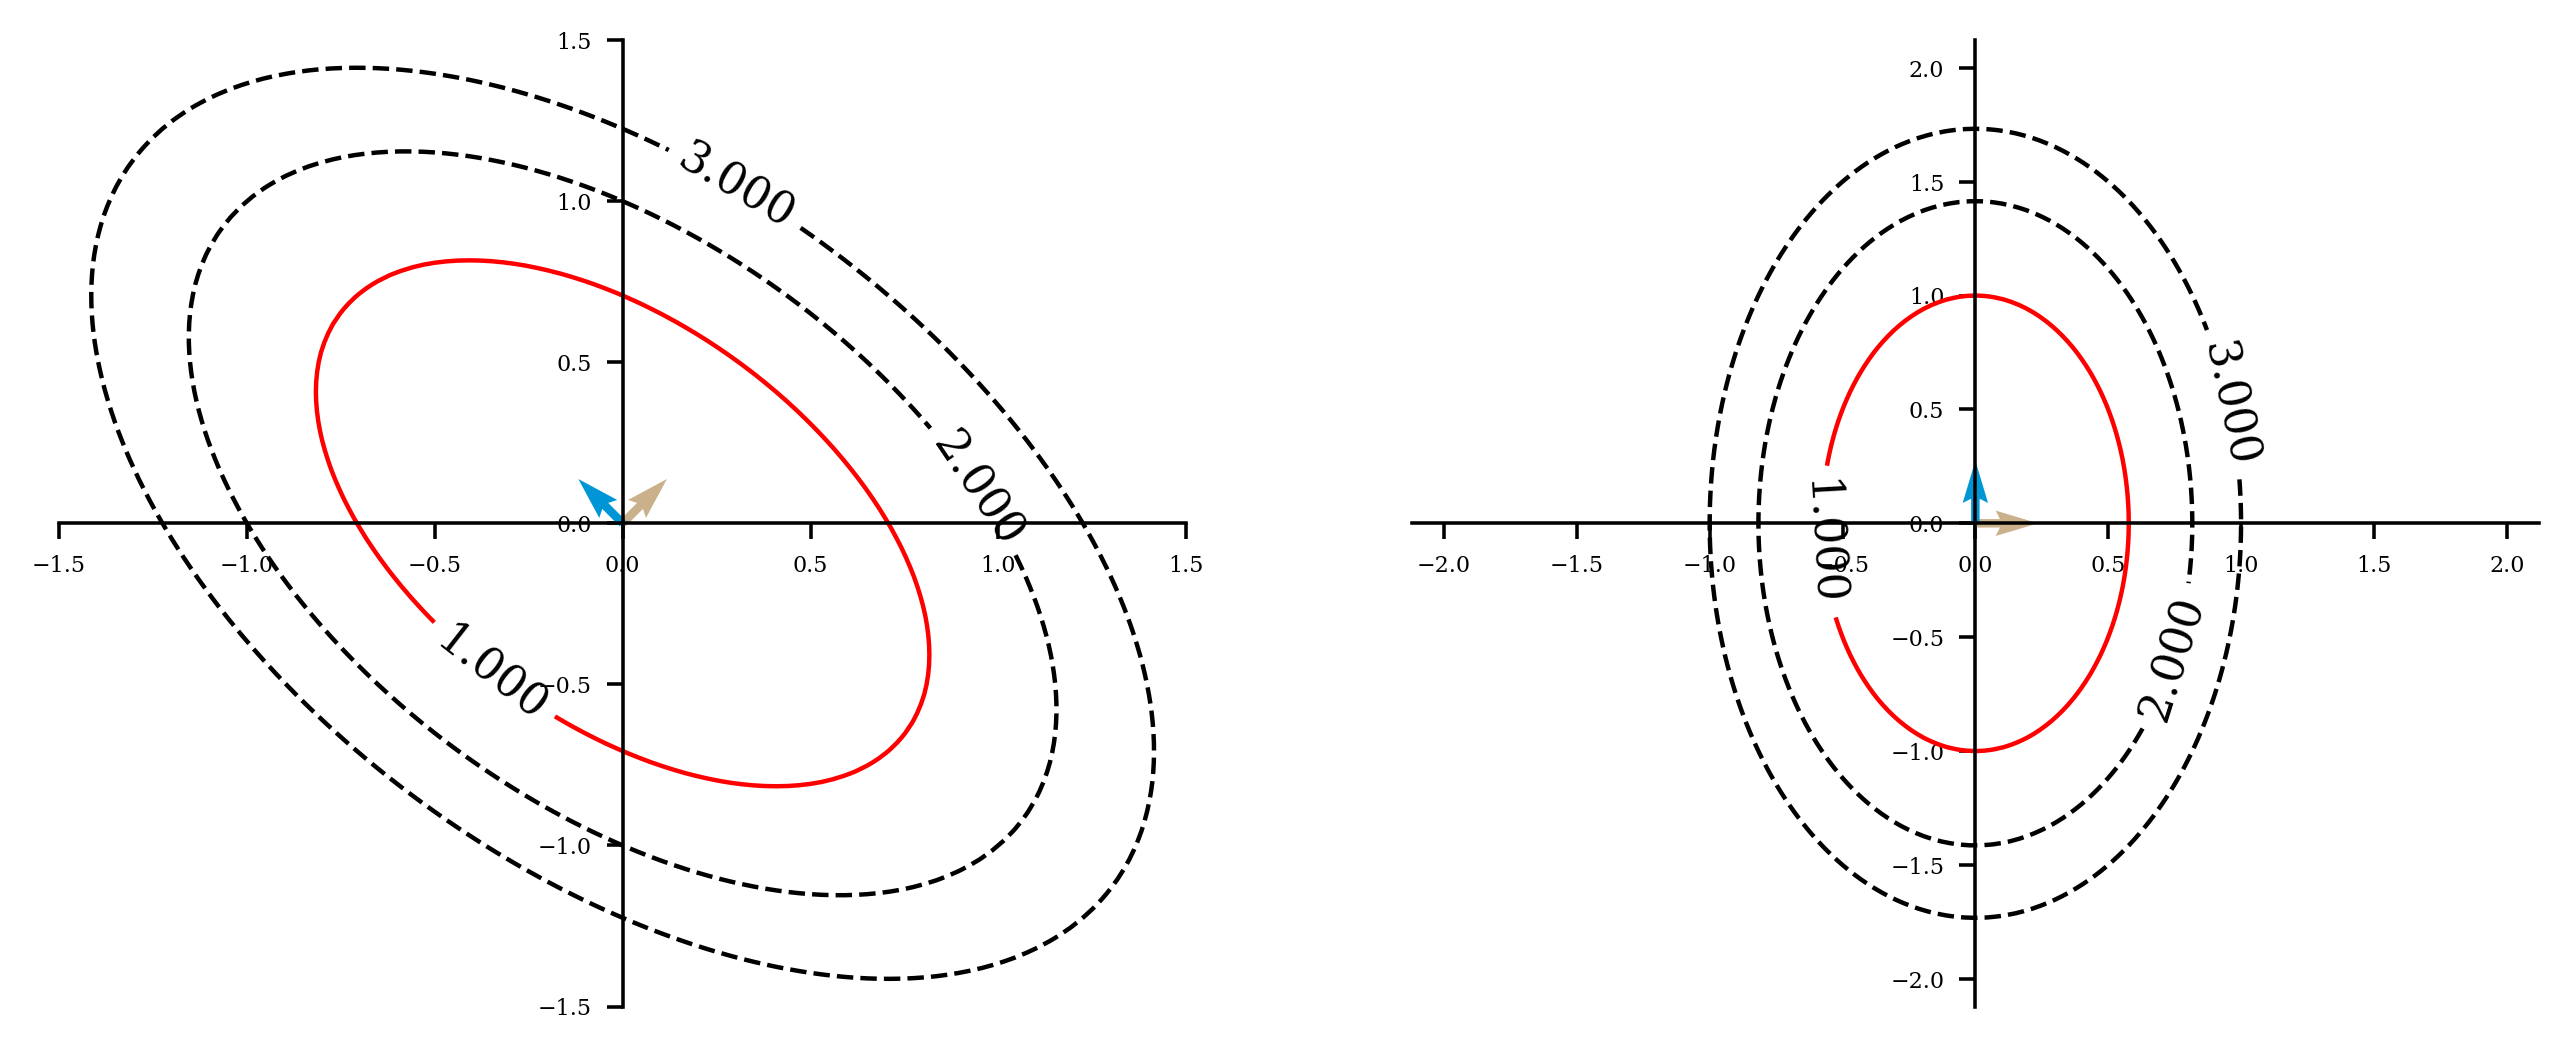

In [184]:
levels = [1,2,3]
with plt.rc_context():
    plt.rc("figure", dpi=160)
    fig, axes = plt.subplots(ncols=2, figsize=(10,4))
    for ax,coord in zip(axes.flat, [(xx,yy,zz), (X,Y,Z)]):
        cs = ax.contour(*coord, levels=levels, colors='black', linestyles='dashed')
        cs.collections[0].set_color('red')
        cs.collections[0].set_linestyle('solid')  
        ax.clabel(cs, inline=1, fontsize=10)
    
        ax.spines['left'].set_position('center')
        ax.spines['bottom'].set_position('center')
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
    
    axes[0].quiver(*Q[:,0], color='#cab18c')
    axes[0].quiver(*Q[:,1], color='#0096d6')
    
    axes[1].quiver(*Q1[:,0], color='#cab18c')
    axes[1].quiver(*Q1[:,1], color='#0096d6')
#

Note that the axes of the titled ellipse on the left are aligned with the eigenvectors of $M$. In the $XY$ system on the right, the axes are along the eigenvectors of $L$, which corresponds with the coordinate axes. As we've removed the cross-product term, it's easier to understand the system:

1. The $X$ coordinates are multiplied by $3$, the first eigenvalue of $M$ 
1. The $Y$ coordinates are multiplied by $1$, the second eigenvalue of $M$

# References

1. Chapter 7 of Linear Algebra and its Applications by David Lay et. al.
1. Section I.7 of Linear Algebra and Learning from Data by Gilbert Strang